In [44]:
import tt
import riemannian
%matplotlib inline

import matplotlib

import numpy as np

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


4 loops, best of 3: 16.8 ms per loop
4 loops, best of 3: 18.4 ms per loop
4 loops, best of 3: 18.3 ms per loop
4 loops, best of 3: 17.8 ms per loop
4 loops, best of 3: 28.8 ms per loop
4 loops, best of 3: 27.9 ms per loop
4 loops, best of 3: 27 ms per loop
4 loops, best of 3: 56.9 ms per loop
4 loops, best of 3: 160 ms per loop
4 loops, best of 3: 306 ms per loop
4 loops, best of 3: 173 ms per loop
4 loops, best of 3: 438 ms per loop
4 loops, best of 3: 1.47 s per loop
4 loops, best of 3: 2.9 s per loop
4 loops, best of 3: 1.31 s per loop
4 loops, best of 3: 4.05 s per loop


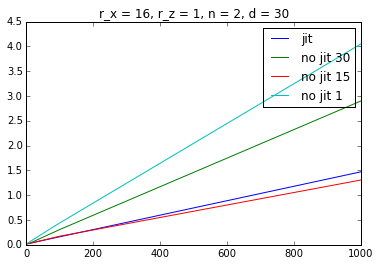

In [91]:
r_x=16
r_z=1
n=2
d=30
N_arr=[1, 10, 100, 1000]

X = tt.rand([n] * d, d, [1] + [r_x] * (d-1) +  [1])
Z = []
for i in xrange(max(N_arr)):
    Z.append(tt.rand([n] * d, d, [1] + [r_z] * (d-1) +  [1]))
plots = np.zeros((4, len(N_arr)))
legends = [None] * plots.shape[0]
for N_idx in xrange(len(N_arr)):
    N = N_arr[N_idx]
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], use_jit=True)
    plots[0, N_idx] = res.best
    legends[0] = 'jit'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], use_jit=False)
    plots[1, N_idx] = res.best
    legends[1] = 'no jit 30'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=15, use_jit=False)
    plots[2, N_idx] = res.best
    legends[2] = 'no jit 15'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=1, use_jit=False)
    plots[3, N_idx] = res.best
    legends[3] = 'no jit 1'
plot_objects = []
for plot_idx in xrange(4):
    handle, = plt.plot(N_arr, plots[plot_idx, :], label=legends[plot_idx])
    plot_objects.append(handle)
plt.legend(handles=plot_objects)
plt.title('r_x = %d, r_z = %d, n = %d, d = %d' % (r_x, r_z, n, d))
plt.show()

4 loops, best of 3: 18.6 ms per loop
4 loops, best of 3: 23.6 ms per loop
4 loops, best of 3: 24.2 ms per loop
4 loops, best of 3: 24 ms per loop
4 loops, best of 3: 49.3 ms per loop
4 loops, best of 3: 244 ms per loop
4 loops, best of 3: 116 ms per loop
4 loops, best of 3: 103 ms per loop
4 loops, best of 3: 381 ms per loop
4 loops, best of 3: 2.54 s per loop
4 loops, best of 3: 1.03 s per loop
4 loops, best of 3: 896 ms per loop
4 loops, best of 3: 1.1 s per loop
4 loops, best of 3: 7.35 s per loop
4 loops, best of 3: 2.94 s per loop
4 loops, best of 3: 2.7 s per loop


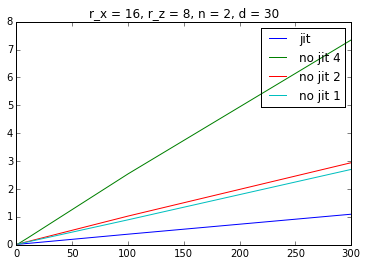

In [93]:
r_x=16
r_z=8
n=2
d=30
N_arr=[1, 10, 100, 300]

X = tt.rand([n] * d, d, [1] + [r_x] * (d-1) +  [1])
Z = []
for i in xrange(max(N_arr)):
    Z.append(tt.rand([n] * d, d, [1] + [r_z] * (d-1) +  [1]))
plots = np.zeros((4, len(N_arr)))
legends = [None] * plots.shape[0]
for N_idx in xrange(len(N_arr)):
    N = N_arr[N_idx]
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], use_jit=True)
    plots[0, N_idx] = res.best
    legends[0] = 'jit'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=4, use_jit=False)
    plots[1, N_idx] = res.best
    legends[1] = 'no jit 4'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=2, use_jit=False)
    plots[2, N_idx] = res.best
    legends[2] = 'no jit 2'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=1, use_jit=False)
    plots[3, N_idx] = res.best
    legends[3] = 'no jit 1'
plot_objects = []
for plot_idx in xrange(4):
    handle, = plt.plot(N_arr, plots[plot_idx, :], label=legends[plot_idx])
    plot_objects.append(handle)
plt.legend(handles=plot_objects)
plt.title('r_x = %d, r_z = %d, n = %d, d = %d' % (r_x, r_z, n, d))
plt.show()

4 loops, best of 3: 304 ms per loop
4 loops, best of 3: 312 ms per loop
4 loops, best of 3: 313 ms per loop
4 loops, best of 3: 324 ms per loop
4 loops, best of 3: 364 ms per loop
4 loops, best of 3: 782 ms per loop
4 loops, best of 3: 765 ms per loop
4 loops, best of 3: 464 ms per loop
4 loops, best of 3: 958 ms per loop
4 loops, best of 3: 14.4 s per loop
4 loops, best of 3: 6.85 s per loop
4 loops, best of 3: 1.45 s per loop
4 loops, best of 3: 1.88 s per loop
4 loops, best of 3: 42.9 s per loop
4 loops, best of 3: 20.1 s per loop
4 loops, best of 3: 3.77 s per loop


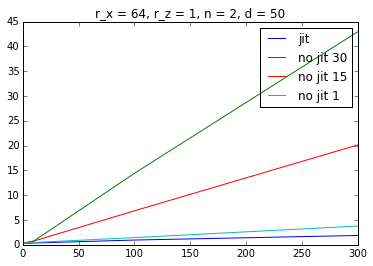

In [94]:
r_x=64
r_z=1
n=2
d=50
N_arr=[1, 10, 100, 300]

X = tt.rand([n] * d, d, [1] + [r_x] * (d-1) +  [1])
Z = []
for i in xrange(max(N_arr)):
    Z.append(tt.rand([n] * d, d, [1] + [r_z] * (d-1) +  [1]))
plots = np.zeros((4, len(N_arr)))
legends = [None] * plots.shape[0]
for N_idx in xrange(len(N_arr)):
    N = N_arr[N_idx]
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], use_jit=True)
    plots[0, N_idx] = res.best
    legends[0] = 'jit'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], use_jit=False)
    plots[1, N_idx] = res.best
    legends[1] = 'no jit 30'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=15, use_jit=False)
    plots[2, N_idx] = res.best
    legends[2] = 'no jit 15'
    res = %timeit -n 4 -o riemannian.project(X, Z[:N], clusterSize=1, use_jit=False)
    plots[3, N_idx] = res.best
    legends[3] = 'no jit 1'
plot_objects = []
for plot_idx in xrange(4):
    handle, = plt.plot(N_arr, plots[plot_idx, :], label=legends[plot_idx])
    plot_objects.append(handle)
plt.legend(handles=plot_objects)
plt.title('r_x = %d, r_z = %d, n = %d, d = %d' % (r_x, r_z, n, d))
plt.show()